In [1]:
import pandas as pd
df = pd.read_csv('./dados_sinteticos_com_erros_atualizado.csv')
print(df.isnull().sum())

C:\Users\mpsga\AppData\Local\Temp\ipykernel_17124\266652235.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


id                  0
data                0
hora                0
cliente             0
produto             0
valor_x             0
quantidade          0
total               0
status              0
cidade              0
estado              0
pais                0
cep                 0
frete               0
pagamento           0
vendedor            0
categoria_x         0
marca               0
modelo              0
cor            160226
tamanho             0
peso                0
altura              0
largura             0
comprimento         0
categoria_y         0
valor_y             0
categoria           0
valor               0
dtype: int64


In [2]:
df = df.drop_duplicates(['id'])
print(df[df.duplicated(['id'],keep=False)])

Empty DataFrame
Columns: [id, data, hora, cliente, produto, valor_x, quantidade, total, status, cidade, estado, pais, cep, frete, pagamento, vendedor, categoria_x, marca, modelo, cor, tamanho, peso, altura, largura, comprimento, categoria_y, valor_y, categoria, valor]
Index: []

[0 rows x 29 columns]


In [3]:
df.to_csv('base_sem_dados_duplicados.csv',sep=',',index=False,encoding='utf-8')
print(df['cidade'].unique())
df = df.drop(columns=['cidade','cor'])

['Cidade']


In [4]:
print(df['pais'].unique())
print(df['pagamento'].unique())
print(df['status'].unique())
print(df['tamanho'].unique())
df = df.drop(columns=['tamanho'])

['Brasil' 'Chile' 'Uruguai' 'Paraguai' 'Colômbia' 'Argentina']
['transferência' 'cheque' 'cartão' 'boleto']
['em separação' 'em trânsito' 'cancelado' 'entregue'
 'aguardando pagamento' 'pago']
[' ']


In [5]:
print(df['valor_y'].equals(df['valor']))
print(df['categoria_y'].equals(df['categoria']))
print(df['categoria_x'].equals(df['categoria']))
linhas_diferentes = df.loc[df['categoria_x'] != df['categoria']]
print(linhas_diferentes[['categoria_x','categoria']])
df.drop(columns=['valor_y','categoria_y'],inplace=True)


True
True
False
        categoria_x    categoria
206       alimentos      bebidas
339      brinquedos      petshop
471         petshop   brinquedos
636        esportes        lazer
755         petshop   brinquedos
...             ...          ...
214243  eletrônicos  informática
214253       livros    papelaria
214269       beleza        saúde
214277   brinquedos      petshop
214295  informática  eletrônicos

[11298 rows x 2 columns]


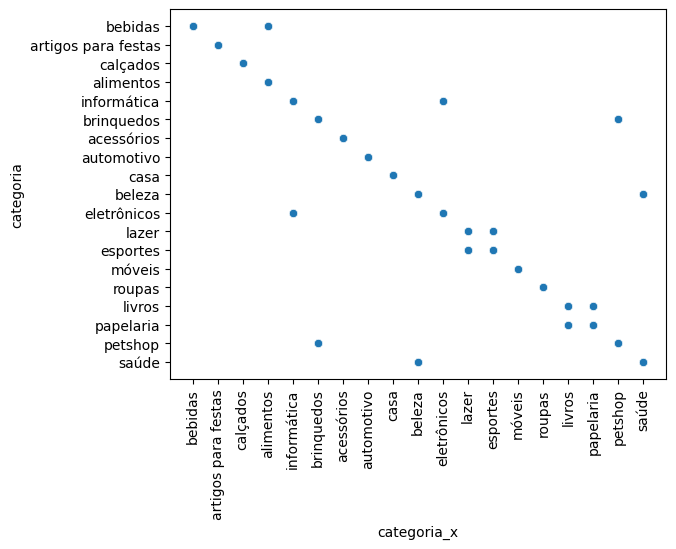

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um gráfico de dispersão
sns.scatterplot(x='categoria_x', y='categoria', data=df)
plt.xticks(rotation=90)
plt.show()